<a href="https://colab.research.google.com/github/jmcmt87/DataScience_portfolio/blob/main/image_clsf_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION PROJECT: Using TensorFlow 2 and Keras to train a neural network to read handwritten digits and how to optimize its accuracy.

In this project we will create and train a neural network to read handwritten digits, we will be using the well-known MNIST dataset for that purpose. 

The main objective of this project, though, will be exploring ways on how to optimize this neural network to get the best accuracy score possible.

## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

### Loading the dataset:

In [ ]:
mnist = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Splitting the Dataset into training sets and test sets:

In [ ]:
(X_full_train, y_full_train), (X_test, y_test) = mnist 

In [ ]:
X_full_train.shape

(60000, 28, 28)

### Normalizing the data:

We divide the dataset once more, this time the training set, one for training purposes and the other for validation purposes. This will help us with the improvement of the accuracy score later on.

Then we will normalize the data dividing the input data in both sets by 255, since the original values are between 0 and 255 this will scale them to be between 0 and 1.

In [ ]:
X_train, X_valid = X_full_train[:5000]/255, X_full_train[5000:]/255
y_train, y_valid = y_full_train[:5000], y_full_train[5000:] 

### Setting labels for the output data

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Creating and Training the ANN (Artificial Neural Network)

We will start first, using a simple architecture for our ANN. For the **activation function of the middle layers** our choice is a **ReLU function** as they normally work well for this type of ANNs.

In the **output layer** it's necessary to use a **softmax function** as our activation function, given that we are dealing with a classification problem and we will need to classify in more than two categories (in this case 10 categories -numbers 0 to 9-).

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


Now it's time to train our model, for the **optimizer** we will be using the **'sgd'**, which will complete the gradient descent using momentum.

The **loss function** will be the **sparse categorical crossentropy function** that is used for classification in multiple categories.

For the **metric** we will be using the **accuracy score** (correctly classified data over total data).

In [ ]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100)

Epoch 1/100
157/157 [==============================] - 3s 14ms/step - loss: 2.2398 - accuracy: 0.1955 - val_loss: 1.9334 - val_accuracy: 0.4485
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 1.7731 - accuracy: 0.5268 - val_loss: 1.4407 - val_accuracy: 0.5997
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 1.3026 - accuracy: 0.6406 - val_loss: 1.0940 - val_accuracy: 0.6813
Epoch 4/100
157/157 [==============================] - 2s 10ms/step - loss: 0.9881 - accuracy: 0.7168 - val_loss: 0.8921 - val_accuracy: 0.7266
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 0.7982 - accuracy: 0.7778 - val_loss: 0.7631 - val_accuracy: 0.7756
Epoch 6/100
157/157 [==============================] - 2s 10ms/step - loss: 0.6718 - accuracy: 0.8137 - val_loss: 0.6838 - val_accuracy: 0.7970
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 0.6035 - accuracy: 0.8187 - val_loss: 0.6211 - val_accuracy:

Plotting the accuracy performance after training our ANN.

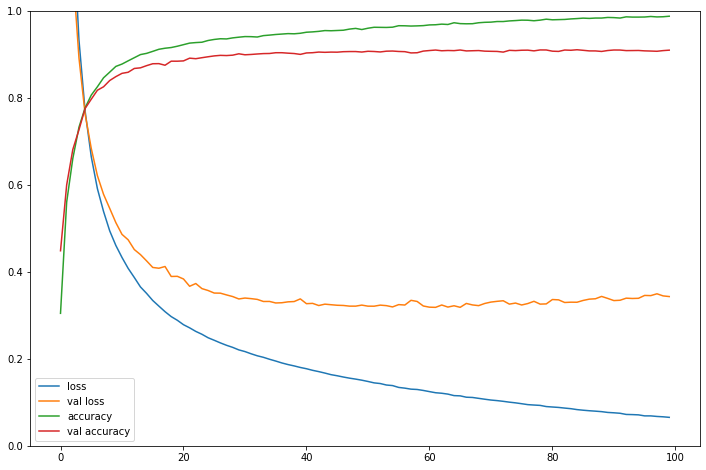

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m.history['loss'], label = 'loss')
plt.plot(m.history['val_loss'], label = 'val loss')
plt.plot(m.history['accuracy'], label = 'accuracy')
plt.plot(m.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

Output given:

In [ ]:
# Let's see the first 10 results of the output it gave us
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2) 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Let's translate the outcome using our labels
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
y_new = y_test[:10]
y_new

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

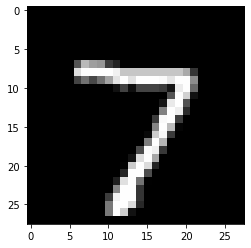

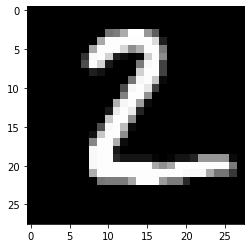

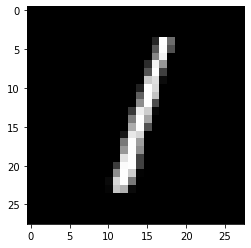

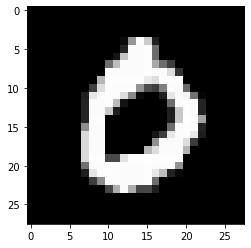

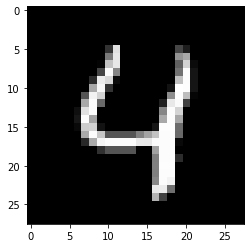

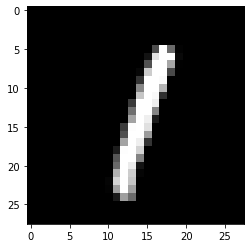

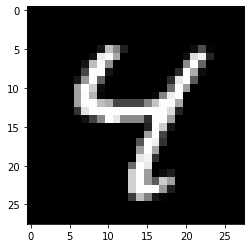

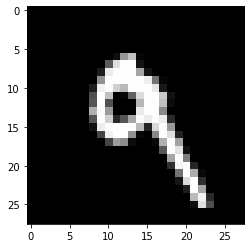

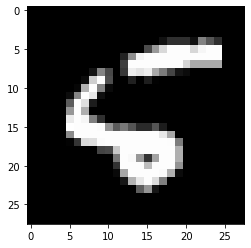

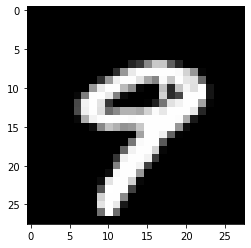

In [ ]:
# Now let's see the numbers and how our model guessed them
for image in X_new:
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()

As we saw, our model performed way better in the test set than in the validation set. In order to narrow down the difference between the validation set and training set performances we should add regularizations. This difference is the almost 9 percentage points, we have a case of severe overfitting and therefore we will use 'l2' regularization, that will squeeze the weights generated after every backpropagation closer to 0, and a 0.20 dropout regularization that will switch off 20% of the neurons randomly with every backpropagation preventing the overspecialization of neurons and ultimately resulting in less overfitting.

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape = [28,28]))
model2.add(keras.layers.Dense(20, activation = 'relu', kernel_regularizer='l2'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(20, activation = 'relu', kernel_regularizer='l2'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model2.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m2 = model2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100)

Epoch 1/100
157/157 [==============================] - 2s 12ms/step - loss: 2.8066 - accuracy: 0.1761 - val_loss: 2.4409 - val_accuracy: 0.3525
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 2.4163 - accuracy: 0.3137 - val_loss: 2.0900 - val_accuracy: 0.4995
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 2.1446 - accuracy: 0.4215 - val_loss: 1.8200 - val_accuracy: 0.6444
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 1.9278 - accuracy: 0.5382 - val_loss: 1.6282 - val_accuracy: 0.7259
Epoch 5/100
157/157 [==============================] - 2s 11ms/step - loss: 1.7762 - accuracy: 0.5910 - val_loss: 1.4882 - val_accuracy: 0.7533
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 1.6773 - accuracy: 0.6243 - val_loss: 1.3795 - val_accuracy: 0.7810
Epoch 7/100
157/157 [==============================] - 2s 11ms/step - loss: 1.5597 - accuracy: 0.6572 - val_loss: 1.2994 - val_accuracy:

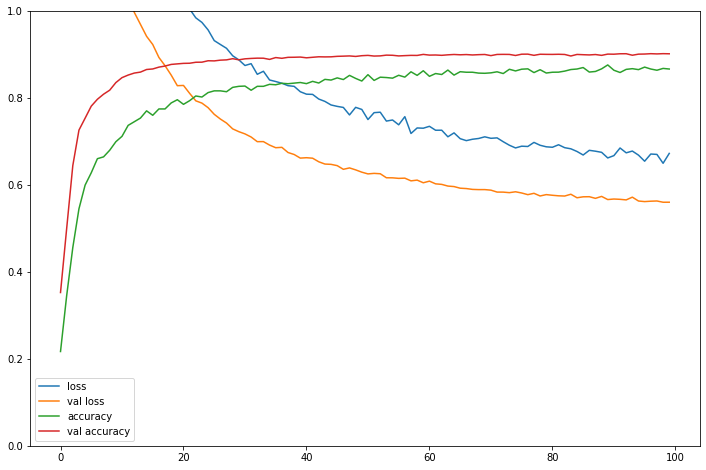

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m2.history['loss'], label = 'loss')
plt.plot(m2.history['val_loss'], label = 'val loss')
plt.plot(m2.history['accuracy'], label = 'accuracy')
plt.plot(m2.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

Seems like there is room for improving when it comes to accuracy, as the cost doesn't seem to have reached the plateau, we will need more iterations and also, this time the training set didnt perform that well, so let's make the neural network wider. 

As we are going to need more iterations it will be also interesting to try another algorithm for optimization, let's try now with 'adam'

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape = [28,28]))
model3.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer='l2'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer='l2'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m3 = model3.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 250)

Epoch 1/250
157/157 [==============================] - 3s 17ms/step - loss: 3.3939 - accuracy: 0.5468 - val_loss: 1.3492 - val_accuracy: 0.8717
Epoch 2/250
157/157 [==============================] - 2s 15ms/step - loss: 1.2770 - accuracy: 0.8536 - val_loss: 0.9853 - val_accuracy: 0.8802
Epoch 3/250
157/157 [==============================] - 2s 15ms/step - loss: 0.9352 - accuracy: 0.8865 - val_loss: 0.8172 - val_accuracy: 0.8924
Epoch 4/250
157/157 [==============================] - 2s 15ms/step - loss: 0.7781 - accuracy: 0.8988 - val_loss: 0.7187 - val_accuracy: 0.9047
Epoch 5/250
157/157 [==============================] - 2s 15ms/step - loss: 0.7128 - accuracy: 0.9049 - val_loss: 0.6616 - val_accuracy: 0.9079
Epoch 6/250
157/157 [==============================] - 2s 15ms/step - loss: 0.6895 - accuracy: 0.9030 - val_loss: 0.6689 - val_accuracy: 0.8962
Epoch 7/250
157/157 [==============================] - 2s 14ms/step - loss: 0.6572 - accuracy: 0.9027 - val_loss: 0.6240 - val_accuracy:

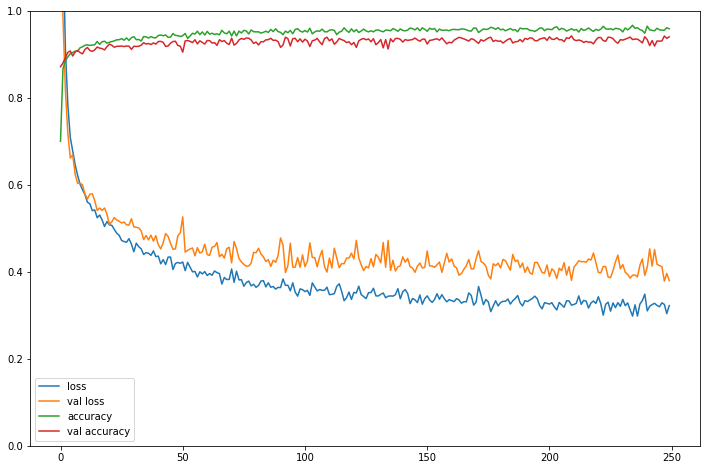

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m3.history['loss'], label = 'loss')
plt.plot(m3.history['val_loss'], label = 'val loss')
plt.plot(m3.history['accuracy'], label = 'accuracy')
plt.plot(m3.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

This irregularities we can find in the different curves means that our model is overshooting when it's near finding the optimal parameters, so we need to make our learning rate smaller. 

If we make it smaller we will also have to increase the number of iteration, given that our model seems to plateau at around 100 iterations, if we make our learning rate 10 times smaller, we will need to multiply this number of iterations by 10 as well, so we will train our model using 1,000 epochs. We will also try increasing the dropout by 0.1 to try to make the difference between the training set and validation set even smaller.

In [ ]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape = [28,28]))
model4.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer='l2'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer='l2'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001) # This sets our learning rate to 0.0001

In [ ]:
model4.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m4 = model4.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 1000)

Epoch 1/1000
157/157 [==============================] - 4s 21ms/step - loss: 5.0711 - accuracy: 0.2134 - val_loss: 4.1192 - val_accuracy: 0.6348
Epoch 2/1000
157/157 [==============================] - 3s 19ms/step - loss: 3.9413 - accuracy: 0.5087 - val_loss: 3.1666 - val_accuracy: 0.7486
Epoch 3/1000
157/157 [==============================] - 3s 20ms/step - loss: 3.1621 - accuracy: 0.6400 - val_loss: 2.5779 - val_accuracy: 0.7942
Epoch 4/1000
157/157 [==============================] - 3s 20ms/step - loss: 2.6516 - accuracy: 0.7057 - val_loss: 2.2127 - val_accuracy: 0.8207
Epoch 5/1000
157/157 [==============================] - 3s 20ms/step - loss: 2.3113 - accuracy: 0.7402 - val_loss: 1.9648 - val_accuracy: 0.8442
Epoch 6/1000
157/157 [==============================] - 3s 19ms/step - loss: 2.0685 - accuracy: 0.7732 - val_loss: 1.7865 - val_accuracy: 0.8569
Epoch 7/1000
157/157 [==============================] - 3s 21ms/step - loss: 1.8845 - accuracy: 0.8068 - val_loss: 1.6564 - val_ac

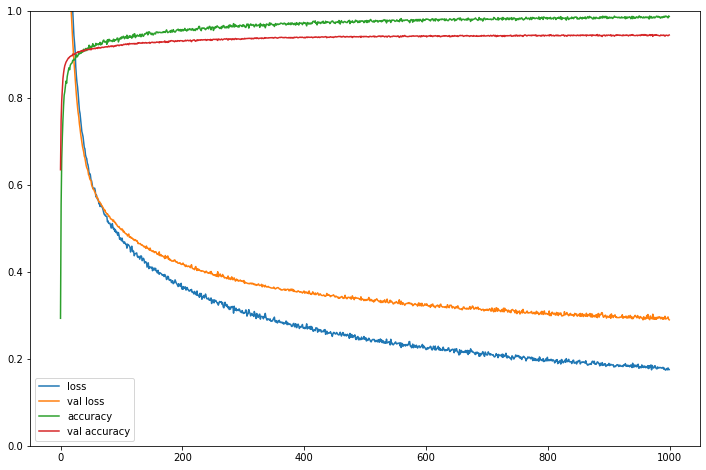

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m4.history['loss'], label = 'loss')
plt.plot(m4.history['val_loss'], label = 'val loss')
plt.plot(m4.history['accuracy'], label = 'accuracy')
plt.plot(m4.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

We have improved our artificial neural network model in more than 4 percentage points.